In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/EE 679 Assignment 3'

Mounted at /content/drive
/content/drive/MyDrive/EE 679 Assignment 3


In [3]:
%pip install hmmlearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 217 kB 4.1 MB/s 


In [4]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal.windows import hamming
import scipy.io.wavfile as wav
import librosa
import os
import sys
import hmmlearn
import pickle
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Speech Endpointing
Window framelength = 20 ms with a 50% overlap.

In [4]:
def endPoint(filepath):
    audio, samplingRate = librosa.load(filepath)
    length = len(audio)
    frames = []

    for i in range(length//160 - 2):
        frames.append(audio[i*160 : (i+2)*160])
    
    start, end = 0, 0
    window = hamming(320) # 320 samples in 20 ms

    for i in range(len(frames)):
        energy = np.matmul(frames[i]*window, frames[i]*window)
        if energy > 0.004: # Energy threshold = 0.004
            start = i
            break
    
    for i in range(len(frames)-1, -1, -1):
        energy = np.matmul(frames[i]*window, frames[i]*window)
        if energy > 0.004:
            end = i
            break

    return np.array(audio[start*160 : (end+2)*160]), samplingRate

# Pre-emphasis
α = 0.98

In [5]:
def pre_emphasis(data, samplingRate):
    y = np.zeros(len(data))
    for i in range(1, len(data)):
        y[i] = data[i] - 0.98*data[i-1]
    return y, samplingRate

# MFCC Feature Extraction

In [6]:
def mfcc(audio, samplingRate):
    c = librosa.feature.mfcc(y = audio, sr = samplingRate, norm = 'ortho', n_mfcc = 15, dct_type = 2, S = None)
    delta = librosa.feature.delta(c, order=1, mode = 'nearest')
    delta2 = librosa.feature.delta(c, order=2, mode = 'nearest')
    return np.concatenate((c, delta , delta2), axis=0)

# Data Creation

In [ ]:
training = {}
os.mkdir('preEmp_train')
for word in os.listdir('train'):
    print(word)
    os.mkdir('preEmp_train/' + word)
    for sample in os.listdir('train/'+ word):
        path = 'train/'+ word + '/' + sample
        endP, sampR = endPoint(path)
        if len(endP) < 10000: # Eliminating empty files
            continue
        preEmp, sampR = pre_emphasis(endP, sampR)
        wav.write('preEmp_train/' + word + '/' + sample, sampR, preEmp)
        coeffs = mfcc(preEmp, sampR).T
        if word not in training.keys():
            training[word] = [coeffs]
        else:
            training[word].append(coeffs)

down
go
left
no
off
on
right
stop
yes
up


In [ ]:
test_clean = {}
for word in os.listdir('test_clean'):
    print(word)
    for sample in os.listdir('test_clean/'+word):
        path = 'test_clean/'+ word + '/' + sample
        endP, sampR = endPoint(path)
        preEmp, sampR = pre_emphasis(endP, sampR)
        coeffs = mfcc(preEmp, sampR).T
        if word not in test_clean.keys():
            test_clean[word] = [coeffs]
        else:
            test_clean[word].append(coeffs)

off


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1760
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=320
  n_fft, y.shape[-1]


no


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=800
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1440
  n_fft, y.shape[-1]


right


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1920
  n_fft, y.shape[-1]


left


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1280
  n_fft, y.shape[-1]


on
down
go


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1120
  n_fft, y.shape[-1]


up


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1600
  n_fft, y.shape[-1]


stop
yes


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=480
  n_fft, y.shape[-1]


In [ ]:
test_noisy = {}
for word in os.listdir('test_noisy'):
    print(word)
    for sample in os.listdir('test_noisy/'+word):
        path = 'test_noisy/'+ word + '/' + sample
        endP, sampR = endPoint(path)
        preEmp, sampR = pre_emphasis(endP, sampR)
        coeffs = mfcc(preEmp, sampR).T
        if word not in test_noisy.keys():
            test_noisy[word] = [coeffs]
        else:
            test_noisy[word].append(coeffs)

go


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


left
no
down
right
off
on
yes
up
stop


In [ ]:
with open("training_clean.pkl", "wb") as file:
    pickle.dump(training , file)

with open("test_task_A.pkl", "wb") as file:
    pickle.dump(test_clean , file)

with open("test_task_B.pkl", "wb") as file:
    pickle.dump(test_noisy , file)

# Adding Noise to Training Data

In [7]:
def noisify(speech, noise): # from add_noise.py
    start = np.random.choice(len(noise) - len(speech))
    noise = noise[start : start + len(speech)]

    # PCM values are from -32768 to 32767
    speech /= 32768
    noise /= 32768

    # Normalizing the noise wrt energy
    speechEnergy = np.sum(speech**2)
    noiseEnergy = np.sum(noise**2)
    noise *= (np.sqrt(speechEnergy/(10*noiseEnergy))) # 10 db SNR

    # Adding noise
    speech += noise

    # Normalizing noisy speech
    newEnergy = np.sum(speech**2)
    speech *= (np.sqrt(speechEnergy/newEnergy))

    # Back to PCM range
    speech *= 32768
    speech = speech.astype(np.int16)

    return speech

In [ ]:
# Adding pink noise
samp_rate, noise = wav.read('_background_noise_/pink_noise.wav')
pnTraining = {}
for word in os.listdir('preEmp_train'):
    print(word)
    for sample in os.listdir('preEmp_train/'+ word):
        preEmp, sampR = librosa.load('preEmp_train/'+ word + '/' + sample)
        noisySpeech = noisify(preEmp , noise)
        coeffs = mfcc(preEmp, sampR).T
        if word not in pnTraining.keys():
            pnTraining[word] = [coeffs]
        else:
            pnTraining[word].append(coeffs)

with open("training_pink_noise.pkl", "wb") as file:
    pickle.dump(pnTraining , file)

down
go
left
no
off
on
right
stop
yes
up


In [ ]:
# Adding white noise
samp_rate, noise = wav.read('_background_noise_/white_noise.wav')
wnTraining = {}
for word in os.listdir('preEmp_train'):
    print(word)
    for sample in os.listdir('preEmp_train/'+ word):
        preEmp, sampR = librosa.load('preEmp_train/'+ word + '/' + sample)
        noisySpeech = noisify(preEmp , noise)
        coeffs = mfcc(preEmp, sampR).T
        if word not in wnTraining.keys():
            wnTraining[word] = [coeffs]
        else:
            wnTraining[word].append(coeffs)

with open("training_white_noise.pkl", "wb") as file:
    pickle.dump(wnTraining , file)

down
go
left
no
off
on
right
stop
yes
up


# Training GMM

In [34]:
def train(hmmStates, nMix, nature):
    fullModel = {}

    for word in training.keys():
        print(word)
        model = hmmlearn.hmm.GMMHMM(n_components = hmmStates, n_mix = nMix, 
                                    n_iter = 20)
        trainData = training[word]

        size = np.zeros([len(trainData), ], dtype = int)
        for i in range(len(trainData)):
            size[i] = trainData[i].shape[0]
        trainData = np.vstack(trainData)

        model.fit(trainData, lengths=size)
        fullModel[word] = model

    with open('model_' + nature + '_' + str(hmmStates) + '_' + str(nMix), 'wb') as file:
        pickle.dump(fullModel, file)
    
    return

In [41]:
# Loading train data
data_file  =  open('training_clean.pkl', 'rb')
training = pickle.load(data_file)
data_file.close()

In [ ]:
# Training on train data
train(6, 1, 'clean')
train(10, 1, 'clean')
train(10, 10, 'clean')
train(16, 10, 'clean')
train(10, 20, 'clean')

In [37]:
# Loading pink noise train data
data_file  =  open('training_pink_noise.pkl', 'rb')
training = pickle.load(data_file)
data_file.close()

In [ ]:
# Training on pink noise train data
train(12, 10, 'pink')
train(6, 15, 'pink')

In [39]:
# Loading white noise train data
data_file  =  open('training_white_noise.pkl', 'rb')
training = pickle.load(data_file)
data_file.close()

In [ ]:
# Training on white noise train data
train(6, 10, 'white')
train(16, 10, 'white')
train(12, 15, 'white')
train(10, 20, 'white')

# Test Data Creation

In [6]:
testAFile  =  open('test_task_A.pkl', 'rb')
testingA = pickle.load(testAFile)
testAFile.close()

testBFile  =  open('test_task_B.pkl', 'rb')
testingB = pickle.load(testBFile)
testBFile.close()

In [9]:
xTestA = []
yTestA = []
for a in testingA.keys():
    for t in range(len(testingA[a])):
        yTestA.append(a)
        xTestA.append(testingA[a][t])

xTestB = []
yTestB = []
for a in testingB.keys():
    for t in range(len(testingB[a])):
        yTestB.append(a)
        xTestB.append(testingB[a][t])

with open("xTestA.pkl", "wb") as file:
    pickle.dump(xTestA, file)
  
with open("xTestB.pkl", "wb") as file:
    pickle.dump(xTestB, file)

with open("yTestA.pkl", "wb") as file:
    pickle.dump(yTestA, file)
  
with open("yTestB.pkl", "wb") as file:
    pickle.dump(yTestB, file)

# Running the Model

In [5]:
def prediction(testData, model):
    return list(model.keys())[np.argmax(np.array([model[k].score(testData) for 
                                                  k in model.keys()]))]

In [7]:
def predictor(filepath): # returns predictions for a particular model
    model_file  =  open(filepath, 'rb')
    model = pickle.load(model_file)
    model_file.close()

    return [prediction(xTestA[i], model) for 
            i in range(len(xTestA))], [prediction(xTestB[i], model) for 
                                       i in range(len(xTestB))]

In [24]:
def confMatrix(nature, hmmStates, nMix):
    # Get predictions
    predsA, predsB = predictor('model_' + nature + '_' + str(hmmStates) + '_' + str(nMix))

    # Task A
    confMat = confusion_matrix(yTestA, predsA)
    acc = sum(np.diag(confMat)/sum(sum(confMat)))
    print("Model: " + 'model_' + nature + '_' + str(hmmStates) + '_' + str(nMix) + ', Task A')
    print("Accuracy = {0:.3f}%".format(acc*100))
    ConfusionMatrixDisplay.from_predictions(yTestA, predsA, labels = list(testingA.keys()), xticks_rotation = 'vertical', cmap = 'Blues')

    # Task B
    confMat = confusion_matrix(yTestB, predsB)
    acc = sum(np.diag(confMat)/sum(sum(confMat)))
    print("Model: " + 'model_' + nature + '_' + str(hmmStates) + '_' + str(nMix) + ', Task B')
    print("Accuracy = {0:.3f}%".format(acc*100))
    ConfusionMatrixDisplay.from_predictions(yTestB, predsB, labels = list(testingB.keys()), xticks_rotation = 'vertical', cmap = 'Blues')

    return

Model: model_clean_6_1, Task A
Accuracy = 79.899%
Model: model_clean_6_1, Task B
Accuracy = 58.317%


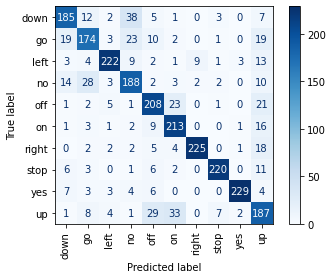

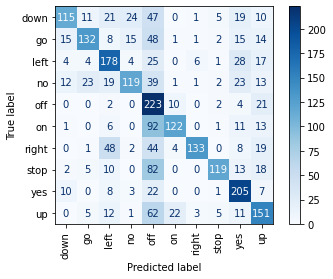

In [51]:
confMatrix('clean', 6, 1)

Model: model_clean_10_1, Task A
Accuracy = 81.885%
Model: model_clean_10_1, Task B
Accuracy = 58.979%


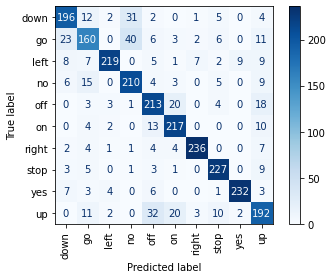

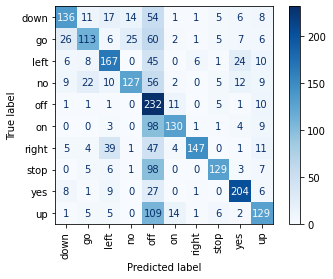

In [52]:
confMatrix('clean', 10, 1)

Model: model_clean_10_10, Task A
Accuracy = 92.793%
Model: model_clean_10_10, Task B
Accuracy = 75.614%


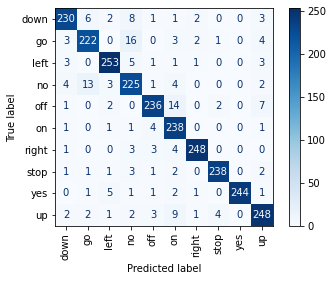

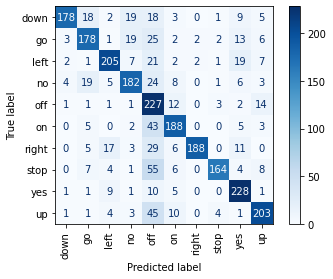

In [53]:
confMatrix('clean', 10, 10)

Model: model_clean_16_10, Task A
Accuracy = 93.300%
Model: model_clean_16_10, Task B
Accuracy = 78.496%


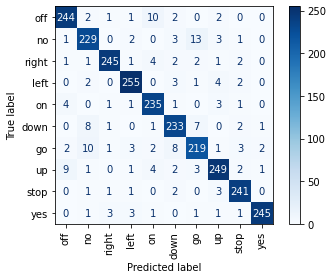

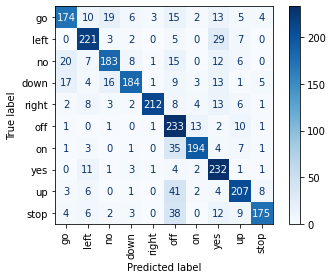

In [43]:
confMatrix('clean', 16, 10)

Model: model_clean_10_20, Task A
Accuracy = 94.001%
Model: model_clean_10_20, Task B
Accuracy = 76.938%


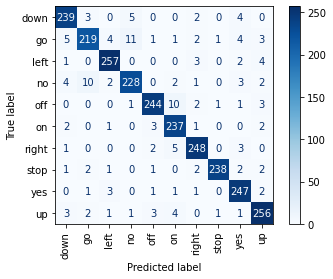

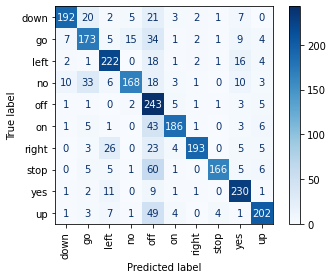

In [60]:
confMatrix('clean', 10, 20)

Streaming output truncated to the last 5000 lines.


Model: model_pink_12_10, Task A
Accuracy = 38.917%
Model: model_pink_12_10, Task B
Accuracy = 28.750%


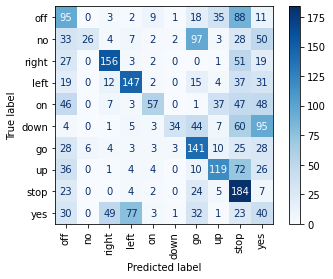

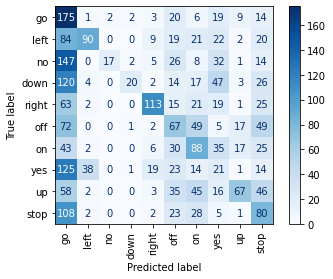

In [31]:
confMatrix('pink', 12, 10)

Model: model_pink_6_15, Task A
Accuracy = 32.295%
Model: model_pink_6_15, Task B
Accuracy = 25.828%


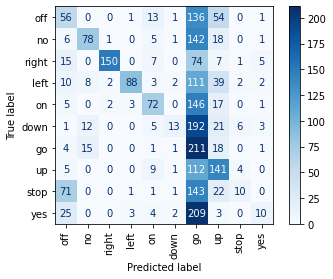

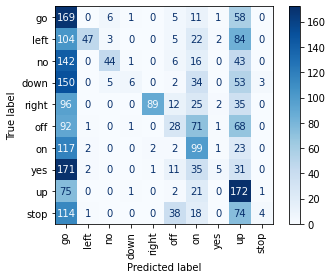

In [25]:
confMatrix('pink', 6, 15)

Model: model_white_6_10, Task A
Accuracy = 31.749%
Model: model_white_6_10, Task B
Accuracy = 22.828%


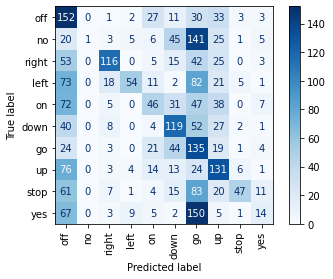

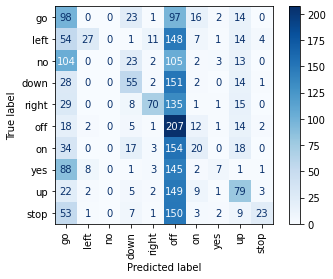

In [26]:
confMatrix('white', 6, 10)

Streaming output truncated to the last 5000 lines.


Model: model_white_16_10, Task A
Accuracy = 8.376%
Model: model_white_16_10, Task B
Accuracy = 9.116%


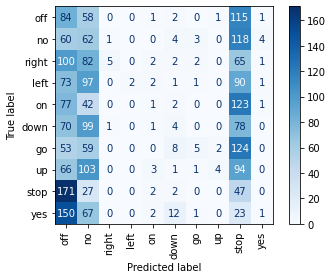

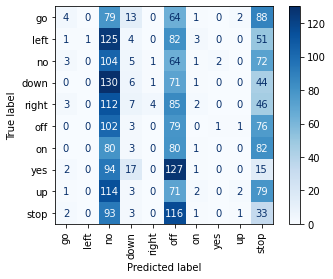

In [30]:
confMatrix('white', 16, 10)

Streaming output truncated to the last 5000 lines.


Model: model_white_12_15, Task A
Accuracy = 13.635%
Model: model_white_12_15, Task B
Accuracy = 11.492%


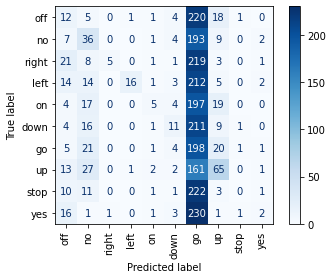

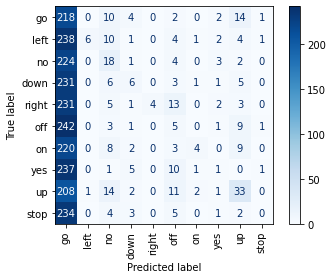

In [28]:
confMatrix('white', 12, 15)

Streaming output truncated to the last 5000 lines.


Model: model_white_10_20, Task A
Accuracy = 21.231%
Model: model_white_10_20, Task B
Accuracy = 16.050%


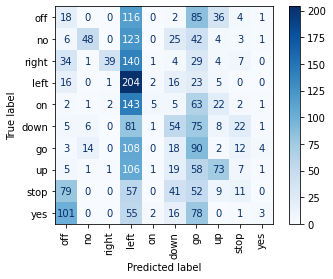

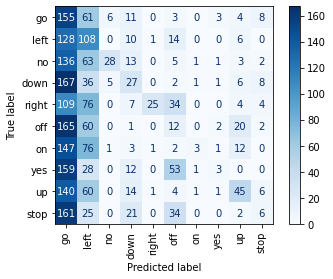

In [29]:
confMatrix('white', 10, 20)